In [3]:
from feature_selector import FeatureSelector

In [2]:
!pip install feature-selector

     |████████████████████████████████| 184kB 4.1MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 67kB/s  eta 0:00:01
     |████████████████████████████████| 716kB 14.0MB/s eta 0:00:01
     |████████████████████████████████| 12.2MB 41kB/s  eta 0:00:01| 1.7MB 6.9MB/s eta 0:00:02ta 0:00:02                   | 4.5MB 6.9MB/s eta 0:00:02     |████████████████████████        | 9.1MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 15.0MB 31kB/s  eta 0:00:011��█▏      | 11.8MB 2.3MB/s eta 0:00:02�█████▍     | 12.4MB 2.3MB/s eta 0:00:02
     |████████████████████████████████| 12.4MB 35kB/s  eta 0:00:01   |█████████████████▉              | 6.9MB 5.0MB/s eta 0:00:02
  Created wheel for seaborn: filename=seaborn-0.8.1-cp36-none-any.whl size=185310 sha256=15a222c0096d32f62a300ad9c36a0b95fda7c191e3ec0bb761eaa4650e8ed574
  Stored in directory: /home/nbuser/.cache/pip/wheels/26/0a/44/53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn
ERROR: skl2onn

In [183]:
import pandas as pd
df = pd.read_csv('./facility_shrink_wkly_a.csv')

In [181]:
df =df.drop("wk_hierarchy_id",axis=1)
#df  =df.drop("fac_id",axis=1)

In [149]:
df.head(5)

,wkly_refund_amt,wkly_refund_cnt,abs_wkly_refund_amt,abs_wkly_refund_cnt,wkly_refund_txn_cnt,wkly_dep_refund_amt,wkly_dep_refund_cnt,abs_wkly_dep_refund_amt,abs_wkly_dep_refund_cnt,wkly_dep_refund_txn_cnt,...,wkly_txn_vd_amt,wkly_txn_vd_cnt,abs_wkly_txn_vd_amt,abs_wkly_txn_vd_cnt,wkly_txn_vd_txn_cnt,wkly_txn_amt,wkly_txn_itm_cnt,abs_wkly_txn_amt,abs_wkly_txn_itm_cnt,wkly_txn_cnt
0,-869.35,-163,898.09,169,114,-4.05,-6,4.05,6,3,...,1643.44,670,2085.16,730,50,377745.40,105625,379381.22,106309,8189
1,-472.69,-83,472.69,83,23,0.00,0,0.00,0,0,...,699.29,168,804.67,196,14,144250.58,33332,144871.82,33492,3274
2,-565.61,-97,672.11,113,66,0.00,0,0.00,0,0,...,2985.21,185,3068.11,217,24,390180.09,75076,390620.31,75248,7705
3,-1209.98,-229,1332.14,257,131,0.00,0,0.00,0,0,...,3032.47,1116,3682.05,1262,76,462962.13,116257,465289.55,116965,12236
4,-622.26,-93,632.22,97,60,0.00,0,0.00,0,0,...,1164.70,482,1376.82,526,25,476575.50,103593,477505.06,103943,11846


In [150]:
train=df.copy()

In [97]:
train =train.drop("Unnamed: 0", axis=1)

In [72]:
train_labels=['fac_id',
'wk_hierarchy_id',
'wkly_refund_amt',
'wkly_refund_cnt',
'abs_wkly_refund_amt',
'abs_wkly_refund_cnt',
'wkly_refund_txn_cnt',
'wkly_dep_refund_amt',
'wkly_dep_refund_cnt',
'abs_wkly_dep_refund_amt',
'abs_wkly_dep_refund_cnt',
'wkly_dep_refund_txn_cnt',
'wkly_itm_vd_amt',
'wkly_itm_vd_cnt',
'abs_wkly_itm_vd_amt',
'abs_wkly_itm_vd_cnt',
'wkly_itm_vd_txn_cnt',
'wkly_dept_key_ring_amt',
'wkly_dept_key_ring_cnt',
'abs_wkly_dept_key_ring_amt',
'abs_wkly_dept_key_ring_cnt',
'wkly_dept_key_ring_txn_cnt',
'wkly_str_cpn_amt',
'wkly_str_cpn_cnt',
'abs_wkly_str_cpn_amt',
'abs_wkly_str_cpn_cnt',
'wkly_str_cpn_txn_cnt',
'wkly_vend_cpn_amt',
'wkly_vend_cpn_cnt',
'abs_wkly_vend_cpn_amt',
'abs_wkly_vend_cpn_cnt',
'wkly_vend_cpn_txn_cnt',
'wkly_misc_refund_amt',
'wkly_misc_refund_cnt',
'abs_wkly_misc_refund_amt',
'abs_wkly_misc_refund_cnt',
'wkly_misc_refund_txn_cnt',
'wkly_prc_ovrd_amt',
'wkly_prc_ovrd_cnt',
'abs_wkly_prc_ovrd_amt',
'abs_wkly_prc_ovrd_cnt',
'wkly_prc_ovrd_txn_cnt',
'wkly_txn_vd_amt',
'wkly_txn_vd_cnt',
'abs_wkly_txn_vd_amt',
'abs_wkly_txn_vd_cnt',
'wkly_txn_vd_txn_cnt',
'wkly_txn_amt',
'wkly_txn_itm_cnt',
'abs_wkly_txn_amt',
'abs_wkly_txn_itm_cnt',
'wkly_txn_cnt',
'md_cycle_nbr',
'md_ld_ts',
'last_update_ts',
'md_crt_usr_id',
'md_upd_usr_id',
'feed_cd',
'batch_id'


]

In [151]:
fs = FeatureSelector(data = train, labels = train_labels)

In [157]:
train.head(5)

,wkly_refund_amt,wkly_refund_cnt,abs_wkly_refund_amt,abs_wkly_refund_cnt,wkly_refund_txn_cnt,wkly_dep_refund_amt,wkly_dep_refund_cnt,abs_wkly_dep_refund_amt,abs_wkly_dep_refund_cnt,wkly_dep_refund_txn_cnt,...,wkly_txn_vd_amt,wkly_txn_vd_cnt,abs_wkly_txn_vd_amt,abs_wkly_txn_vd_cnt,wkly_txn_vd_txn_cnt,wkly_txn_amt,wkly_txn_itm_cnt,abs_wkly_txn_amt,abs_wkly_txn_itm_cnt,wkly_txn_cnt
0,-869.35,-163,898.09,169,114,-4.05,-6,4.05,6,3,...,1643.44,670,2085.16,730,50,377745.40,105625,379381.22,106309,8189
1,-472.69,-83,472.69,83,23,0.00,0,0.00,0,0,...,699.29,168,804.67,196,14,144250.58,33332,144871.82,33492,3274
2,-565.61,-97,672.11,113,66,0.00,0,0.00,0,0,...,2985.21,185,3068.11,217,24,390180.09,75076,390620.31,75248,7705
3,-1209.98,-229,1332.14,257,131,0.00,0,0.00,0,0,...,3032.47,1116,3682.05,1262,76,462962.13,116257,465289.55,116965,12236
4,-622.26,-93,632.22,97,60,0.00,0,0.00,0,0,...,1164.70,482,1376.82,526,25,476575.50,103593,477505.06,103943,11846


In [152]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [116]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

In [117]:
fs.missing_stats.head(10)

,missing_fraction
fac_id,0.0
wk_hierarchy_id,0.0
wkly_vend_cpn_cnt,0.0
abs_wkly_vend_cpn_amt,0.0
abs_wkly_vend_cpn_cnt,0.0
wkly_vend_cpn_txn_cnt,0.0
wkly_misc_refund_amt,0.0
wkly_misc_refund_cnt,0.0
abs_wkly_misc_refund_amt,0.0
abs_wkly_misc_refund_cnt,0.0


Single Unique Value

In [118]:
fs.identify_single_unique()

0 features with a single unique value.



In [119]:

single_unique = fs.ops['single_unique']
single_unique


[]

Collinear (highly correlated) Features

In [153]:
fs.identify_collinear(correlation_threshold=0.975)

13 features with a correlation magnitude greater than 0.97.



In [154]:
correlated_features = fs.ops['collinear']
correlated_features[:5]


['abs_wkly_dep_refund_cnt',
 'wkly_dep_refund_txn_cnt',
 'abs_wkly_itm_vd_amt',
 'abs_wkly_itm_vd_cnt',
 'abs_wkly_dept_key_ring_amt']

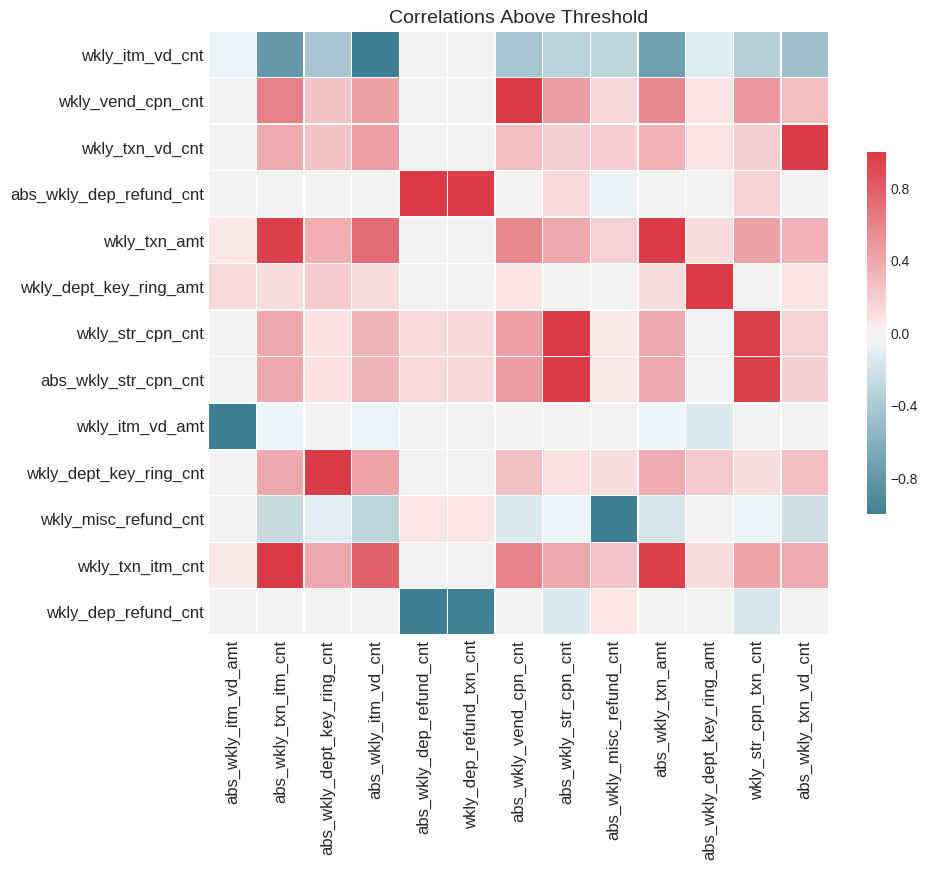

In [123]:
fs.plot_collinear()

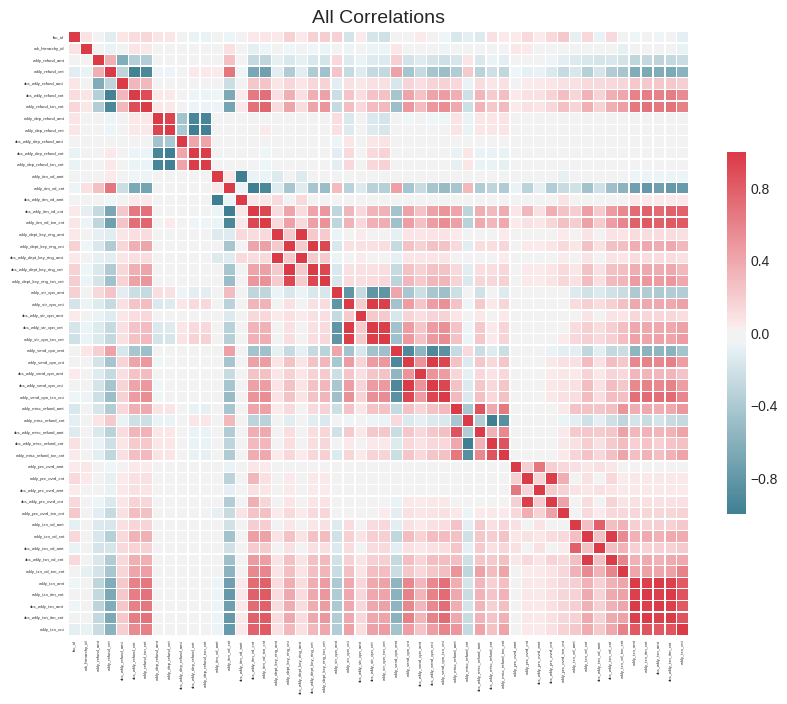

In [124]:
fs.plot_collinear(plot_all=True)

In [155]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,abs_wkly_dep_refund_cnt,wkly_dep_refund_cnt,-0.999911
1,wkly_dep_refund_txn_cnt,wkly_dep_refund_cnt,-0.976966
2,wkly_dep_refund_txn_cnt,abs_wkly_dep_refund_cnt,0.977597
3,abs_wkly_itm_vd_amt,wkly_itm_vd_amt,-1.000000
4,abs_wkly_itm_vd_cnt,wkly_itm_vd_cnt,-1.000000


In [158]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[225]	valid_0's auc: 0.999957
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[231]	valid_0's auc: 0.999821
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[456]	valid_0's auc: 0.999937
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[194]	valid_0's auc: 0.999979
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[221]	valid_0's auc: 0.999883
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[185]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[241]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best 

In [159]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 50 original features
There are 0 one-hot features


In [160]:
fs.data_all.head(10)

,wkly_refund_amt,wkly_refund_cnt,abs_wkly_refund_amt,abs_wkly_refund_cnt,wkly_refund_txn_cnt,wkly_dep_refund_amt,wkly_dep_refund_cnt,abs_wkly_dep_refund_amt,abs_wkly_dep_refund_cnt,wkly_dep_refund_txn_cnt,...,wkly_txn_vd_amt,wkly_txn_vd_cnt,abs_wkly_txn_vd_amt,abs_wkly_txn_vd_cnt,wkly_txn_vd_txn_cnt,wkly_txn_amt,wkly_txn_itm_cnt,abs_wkly_txn_amt,abs_wkly_txn_itm_cnt,wkly_txn_cnt
0,-869.35,-163,898.09,169,114,-4.05,-6,4.05,6,3,...,1643.44,670,2085.16,730,50,377745.40,105625,379381.22,106309,8189
1,-472.69,-83,472.69,83,23,0.00,0,0.00,0,0,...,699.29,168,804.67,196,14,144250.58,33332,144871.82,33492,3274
2,-565.61,-97,672.11,113,66,0.00,0,0.00,0,0,...,2985.21,185,3068.11,217,24,390180.09,75076,390620.31,75248,7705
3,-1209.98,-229,1332.14,257,131,0.00,0,0.00,0,0,...,3032.47,1116,3682.05,1262,76,462962.13,116257,465289.55,116965,12236
4,-622.26,-93,632.22,97,60,0.00,0,0.00,0,0,...,1164.70,482,1376.82,526,25,476575.50,103593,477505.06,103943,11846
5,-1639.21,-25,1639.21,25,17,0.00,0,0.00,0,0,...,2881.44,229,2904.76,233,30,195516.31,40496,198772.97,40590,3575
6,-759.90,-132,791.20,142,88,-0.10,-1,0.10,1,1,...,2882.26,854,3492.10,936,68,312050.86,84120,313346.18,84830,8643
7,-496.90,-109,715.08,157,63,0.00,0,0.00,0,0,...,788.21,271,912.59,295,22,416121.82,84458,416959.92,84708,7898
8,-934.88,-100,948.42,106,53,0.00,0,0.00,0,0,...,980.48,367,1258.58,409,28,372535.59,80918,373453.79,81156,6611
9,-691.53,-131,738.49,159,77,-2.01,-1,2.01,1,1,...,1192.07,491,1281.87,507,18,345061.77,93644,346299.37,94156,7181


In [161]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

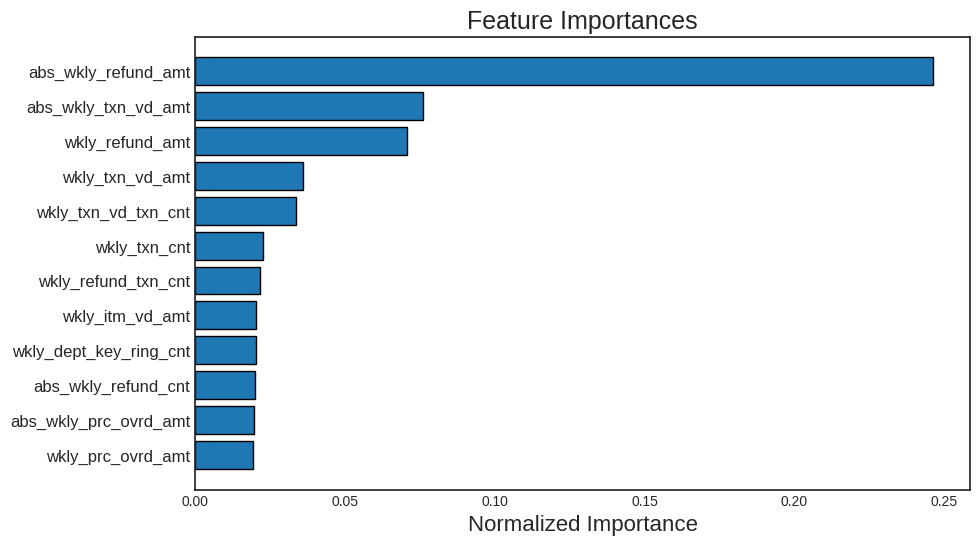

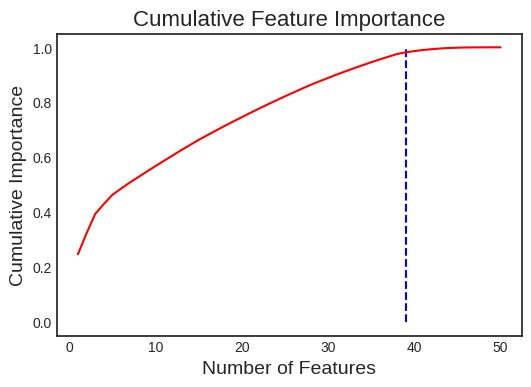

39 features required for 0.98 of cumulative importance


In [163]:
fs.plot_feature_importances(threshold = 0.98, plot_n = 12)

In [164]:
fs.feature_importances.head(10)



,feature,importance,normalized_importance,cumulative_importance
0,abs_wkly_refund_amt,1813.6,0.246346,0.246346
1,abs_wkly_txn_vd_amt,560.0,0.076066,0.322412
2,wkly_refund_amt,519.7,0.070592,0.393005
3,wkly_txn_vd_amt,265.3,0.036036,0.429041
4,wkly_txn_vd_txn_cnt,248.5,0.033754,0.462795
5,wkly_txn_cnt,165.9,0.022535,0.485330
6,wkly_refund_txn_cnt,159.7,0.021692,0.507023
7,wkly_itm_vd_amt,149.9,0.020361,0.527384
8,wkly_dept_key_ring_cnt,149.7,0.020334,0.547718
9,abs_wkly_refund_cnt,146.2,0.019859,0.567577


Low Importance Feature


In [167]:
fs.identify_low_importance(cumulative_importance = 0.99)

40 features required for cumulative importance of 0.99 after one hot encoding.
10 features do not contribute to cumulative importance of 0.99.



In [171]:

low_importance_features = fs.ops['low_importance']
low_importance_features[:15]


['abs_wkly_dept_key_ring_amt',
 'abs_wkly_txn_itm_cnt',
 'abs_wkly_itm_vd_cnt',
 'abs_wkly_itm_vd_amt',
 'wkly_dep_refund_amt',
 'abs_wkly_dep_refund_amt',
 'wkly_dep_refund_txn_cnt',
 'wkly_dep_refund_cnt',
 'abs_wkly_dep_refund_cnt',
 'abs_wkly_dept_key_ring_cnt']

Removing Features

In [172]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [173]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])


Removed 1 features.


To remove the features from all of the methods, pass in method='all'. Before we do this, we can check how many features will be removed using check_removal. This returns a list of all the features that have been idenfitied for removal.

In [174]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 16 features identified for removal


['abs_wkly_txn_amt',
 'abs_wkly_dept_key_ring_amt',
 'wkly_str_cpn_txn_cnt',
 'abs_wkly_txn_vd_cnt',
 'wkly_dep_refund_cnt',
 'abs_wkly_dep_refund_amt']

In [175]:
train_removed = fs.remove(methods = 'all')

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 16 features.


Handling One-Hot Features

In [176]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 16 features including one-hot features.


In [177]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 50
Final Number of Features:  34


Alternative Option for Using all Methods

In [184]:
fs = FeatureSelector(data = df, labels = train_labels)



In [186]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [187]:
fs.identify_collinear(correlation_threshold=0.975)

13 features with a correlation magnitude greater than 0.97.



In [189]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[244]	valid_0's auc: 0.999962
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[216]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[265]	valid_0's auc: 0.999938
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[98]	valid_0's auc: 0.997942
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[482]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[195]	valid_0's auc: 0.999011
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[200]	valid_0's auc: 0.998708
Training until validation scores don't improve for 100 rounds.
Early stopping, best i

In [190]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'collinear', 'zero_importance'] methods have been run

Removed 13 features.


In [196]:

fs.feature_importances.head(40)


,feature,importance,normalized_importance,cumulative_importance
0,abs_wkly_refund_amt,1780.1,0.260134,0.260134
1,abs_wkly_txn_vd_amt,499.8,0.073038,0.333173
2,wkly_refund_amt,459.9,0.067207,0.400380
3,wkly_txn_vd_amt,216.9,0.031697,0.432077
4,wkly_txn_vd_txn_cnt,209.4,0.030601,0.462677
5,wkly_itm_vd_amt,147.0,0.021482,0.484159
6,abs_wkly_refund_cnt,146.6,0.021423,0.505582
7,wk_hierarchy_id,146.2,0.021365,0.526947
8,wkly_refund_txn_cnt,130.5,0.019071,0.546018
9,wkly_str_cpn_txn_cnt,125.7,0.018369,0.564387


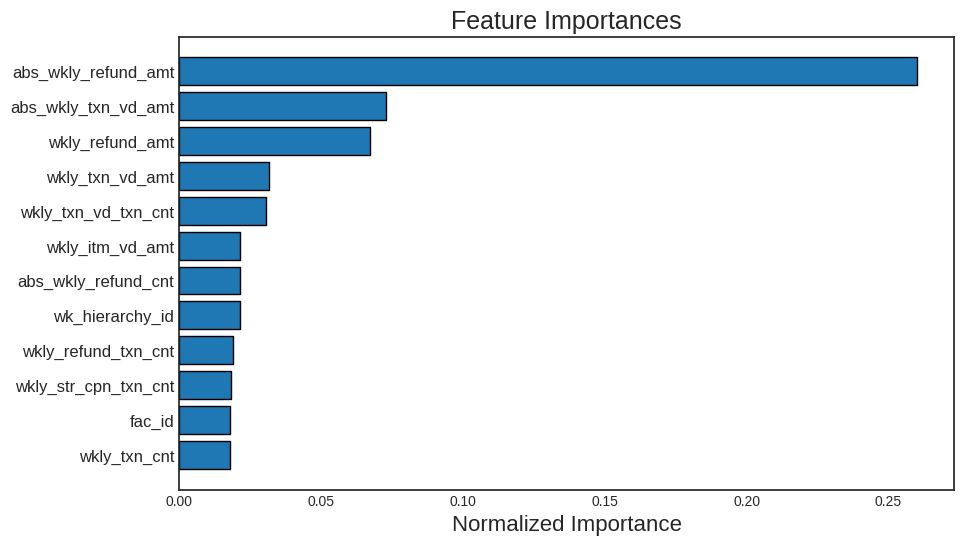

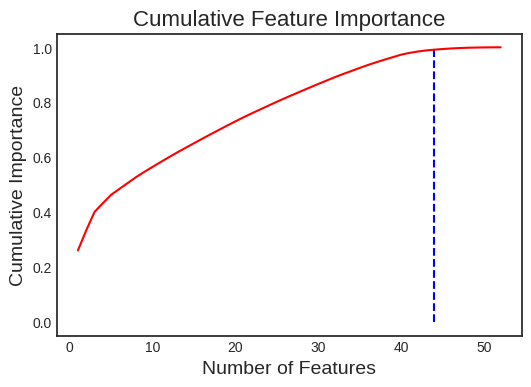

44 features required for 0.99 of cumulative importance


In [197]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)